<center><h1>Projet IA - Fake News & Deep Fake</h1></center>

<center><h1>Présenté par Shabboo ALEAGHA & Ophélie ENGASSER</h1></center>

<center><h2>M2-IADS-EL - Mai 2024</h2></center>

# Notebook #2. Deep learning models - Simple embedding - RNN + uni $\lor$ bidir-LSTM + CNN // Word2Vec

# Importation des librairies

In [ ]:
# pour l'exploration des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# pour le traitement linguistique des données
import re
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string

# pour le modèle Word2Vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

# pour la préparation des données
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# pour la vectorisation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# pour la modélisation et l'optimisation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, BatchNormalization, Dropout, SimpleRNN, LSTM, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# pour l'évaluation
from sklearn.metrics import classification_report

# pour l'exportation-importation des fonctions et modèles
import pickle
from joblib import dump
from joblib import load

# pour ignorer les warnings
import warnings
warnings.filterwarnings("ignore")

# Modèles de DL

A l'instar de plusieurs auteurs, nous avons comparé dans la partie précédente différents modèles de Machine Learning basés sur une vectorisation par TF-IDF. Mais de nombreuses données de la littérature (e.g. les travaux de Al-Tai, Nema & Al-Sherbaz, 2023, ou de Mridha et al., 2021) mettent en évidence de plus faibles performances sur de tels modèle de Machine Learning traditionnels, tels que nous l'avons réalisé, comparativement à des modèles axés sur des réseaux neuronaux. Il se trouve que les modèles traditionnels, malgré leur avantage sur certaines tâches à haut niveau calculatoire, performent parfois moins bien sur des tâches plus proches de la cognition humaine (comme reconnaître une voix, classer des photos, etc.) Cela a conduit les chercheurs à développer des modèles basés sur des réseaux de neurones artificiels. La branche de l'apprentissage profond ou Deep Learning, qui considère ce type d'architecture, s'est révélée hautement efficace notamment dans la résolution de problèmes complexes à partir du traitement du langage naturel.  C'est ce qui nous conduit tout naturellement, en nous basant sur cette idée, à considérer à présent de tels modèles. Pour une revue de la littérature sur cette question, voir Hu et al., 2022. A l'instar de plusieurs auteurs, nous avons comparé dans la partie précédente différents modèles de Machine Learning basés sur une vectorisation par TF-IDF. Mais de nombreuses données de la littérature (e.g. les travaux de Al-Tai, Nema & Al-Sherbaz, 2023, ou de Mridha et al., 2021) mettent en évidence de plus faibles performances sur de tels modèle de Machine Learning traditionnels, tels que nous l'avons réalisé, comparativement à des modèles axés sur des réseaux neuronaux. Il se trouve que les modèles traditionnels, malgré leur avantage sur certaines tâches à haut niveau calculatoire, performent parfois moins bien sur des tâches plus proches de la cognition humaine (comme reconnaître une voix, classer des photos, etc.) Cela a conduit les chercheurs à développer des modèles basés sur des réseaux de neurones artificiels. La branche de l'apprentissage profond ou Deep Learning, qui considère ce type d'architecture, s'est révélée hautement efficace notamment dans la résolution de problèmes complexes à partir du traitement du langage naturel.  C'est ce qui nous conduit tout naturellement, en nous basant sur cette idée, à considérer à présent de tels modèles. Pour une revue de la littérature sur cette question, voir Hu et al., 2022. Par exemple, Ma et al. (2016) modélisent la relation séquentielle entre des publications grâce à des réseaux de neurones récurrents (RNN). Yu et al. (2017) utilisent des réseaux convolutionnels (CNN) pour représenter des relations sémantiques de haut niveau. Une architecture CNN permet également à un groupe d’auteurs de traiter des fake news à partir d’une entrée multimodale texte-image (Yang et al., 2018). Bian et al. (2020) exploitent les réseaux neuronaux basés sur des graphes (GCN) selon un process bottom-up et top-down pour le même type de tâche. Khattar et al. (2019) proposent l'auto-encodeur variationnel multi-modal (MVAE) pour extraire les représentations multi-modales cachées dans des nouvelles. De nombreux auteurs tirent profit de la bidirectionnalité du modèle pré-entraîné BERT pour engager de bonnes performances dans ce domaine. Ainsi, Kaliyar, Goswami & Narang (2021) obtiennent une accuracy de presque 99% à l’aide d’un BERT combiné à des couches convolutives. Kula, Choras & Kozik (2021), quant à eux, obtiennent un bon modèle de détection avec un BERT combiné à une architecture RNN. Ces deux dernières études suggèrent, comme de nombreuses autres, que le modèle BERT serait particulièrement réceptif à ce genre de cas d’usage.

Outre l'introduction des réseaux neuronaux, nous introduisons ici aussi le concept de words embedding. Contrairement à TF-IDF, qui calcule l'importance des mots relativement à leur représentation d'ensemble, mais traite chaque mot indépendamment, la méthode words embedding capture la sémantique des mots en les plaçant dans un espace vectoriel continu où les mots ayant des significations similaires sont situés à proximité les uns des autres. Il a été montré que l'utilisation conjointe de cette méthode et de réseaux neuronaux améliore les performances à certaines tâches. Certaines études, comme celle de Mridha et al. (2021) comparent différentes méthodes, basées sur la fréquence des mots ou sur leur contexte sémantique.


D'un point de vue méthodologique, nous proposerons différents modèles et architectures, allant du plus simple au plus complexe. Nous débuterons, à partir des données pré-traitées dans la partie précédente, par vectoriser celles-ci dans le but de les fournir aux modèles, puis nous nous concentrerons sur :
- Un simple réseau de neurones avec une couche d'embedding.
- Des modèles basés sur un traitement séquentiels des textes (RNN, LSTM uni et bi-directionnel) apprenant sur leurs propres couches d'embedding. 
- Un modèle combinant un traitement séquentiel et convolutif (LSTM+CNN).
- Des modèles utilisant des embeddings via l'utilisation de Word2Vec (modèle pré-entraîné par Google).
- Des modèles entièrement pré-entraînés comme BERT via un apprentissage par transfert.

Chaque modèle fera l'objet d'une optimisation par ajustement des hyperparamètres de manière itérative, et en ajustant chaque hyperparamètre de manière indépendante, toutes choses égales par ailleurs dans le modèle. Ainsi, cela nous permettra de conserver une maîtrise de la comparaison des résulats. 

Pour cette section, nous avons suivi le cours Udemy "Deep learning avec Tensorflow et Keras | Masterclass Python" de José Portilla, Rod & MonCoachData.

# Conversion des textes en séquences

Après avoir divisé les textes en unités de mots (tokenizing), nous allons encoder les textes en entiers grâce à la méthode text_to_sequences() en fonction du vocabulaire de notre corpus (sequencing). Chaque vecteur sera fixe pour correspondre à un nombre constant d'entier. Il s'agira donc, soit de tronquer le vecteur si la séquence dépasse la constante, soit de remplir le vecteur de zéros si la séquence est trop courte (padding).

Pour cela, nous devons repartir de notre dataset pré-traité.

In [28]:
# ouverture
path_pc = 'C:/Users/Engasser Ophélie/Desktop/ProjetIA/data_preprocessed.csv'
df = pd.read_csv(path_pc)
df = df.iloc[:, 2:]
df = df.dropna(subset=['preprocessed_text'])
df.shape

(19348, 52)

In [29]:
# préparation
X = df['preprocessed_text']
y = df['type']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [30]:
# décomposition en tuples
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=101)
print(len(df), len(X_train), len(X_test), len(y_train), len(y_test))

19348 15478 3870 15478 3870


## Tokenising

In [31]:
# instanciation du tokenizer (10000 mots) avec une chaîne spéciale pour stocker les mots hors vocabulaire '<00v>' (mappée à l'indice 1)
tokenizer = Tokenizer(num_words=10000, oov_token = '<00v>')
tokenizer

Nous allons ajuster le tokenizer à notre corpus de textes : ainsi, l'objet apprendra les mots uniques présents dans les textes d'entraînement et créera un dictionnaire qui mappe chaque mot à un index entier unique.

In [32]:
# ajustement du tokenizer sur le corpus
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [37]:
# affichage des 10 premières clés-valeurs du dictionnaire
list(word_index.items())[0:10]

[('<00v>', 1),
 ('trump', 2),
 ('said', 3),
 ('clinton', 4),
 ('state', 5),
 ('would', 6),
 ('one', 7),
 ('peopl', 8),
 ('elect', 9),
 ('presid', 10)]

Les clés sont les mots et les valeurs sont les indices dont le rang est fonction de la fréquence du mot.

In [38]:
# longueur du dictionnaire
len(word_index)

80544

Rappelons que la matrice TF-IDF comportait le même nombre de mots, nous relevons donc une cohérence entre les deux traitements.

## Sequencing et padding

In [33]:
# utilisation de l'objet tokenizer pour obtenir des séquences d'index sur tout le corpus (matrice X)
sequences = tokenizer.texts_to_sequences(X)

In [40]:
# vérifications
print(type(sequences))
print(sequences[0])
print(sequences[1])

<class 'list'>
[1796, 273, 2, 1704, 1075, 631, 432, 263, 1204, 1, 10, 9, 6636, 510, 3170, 6974, 5549, 3129, 2, 2, 1, 1, 9960, 1, 2, 1, 2356, 45, 970, 3, 1, 1, 1, 5765, 73, 3353, 2074, 2598, 1, 2, 1, 574, 45, 3502, 604, 2, 9958, 453, 60, 604, 479, 184, 118, 43, 2, 8, 3886, 7687, 2193, 9125, 5683, 2445, 775, 1, 34, 1, 4914, 55, 24, 773, 371, 599, 1482, 1260, 277, 6290, 1131, 102, 842, 2, 556, 1, 1568, 658, 1341, 10, 171, 1651, 7024, 599, 950, 275, 1, 1482, 10, 9, 27, 35, 1397, 207, 1218, 320, 18, 323, 108, 201, 2214, 161, 1708, 8380, 91, 777, 29, 381, 950, 2693, 2, 219, 4491, 822, 777, 96, 773, 99, 8368, 604, 207, 1218, 386, 2, 1704, 2193, 9125, 102, 39, 1812, 2, 2187, 1, 1, 2964, 5987, 1, 299, 3622, 2428, 2878, 1759, 2223, 320, 276, 3151, 2, 33, 2807, 1759, 1, 2, 603, 12, 1, 294, 103, 428, 740, 404, 383, 1912, 3292, 588, 1167, 1, 3666, 4809, 319, 1756, 99, 378, 773, 276, 2, 371, 334, 1260, 179, 1453, 1480, 1168, 1, 1867, 7741, 3, 7177, 9400, 400, 54, 49, 1772, 982, 10, 25, 782, 76, 2068

Les séquences ont bien été générées, elles sont de tailles différentes car chaque article a une taille différente.

In [41]:
# longueur des 10 premiers articles
[len(text) for text in sequences[0:10]]

[588, 187, 527, 734, 250, 412, 185, 684, 761, 281]

In [36]:
# observation sur l'ensemble du dataset
lengths_of_texts =  [len(text) for text in sequences]

print("Longueur max. {}".format(np.max(lengths_of_texts)))
print("Longueur min. {}".format(np.min(lengths_of_texts)))
print("Moyenne et médiane {:.2f}, {}".format(np.mean(lengths_of_texts), np.median(lengths_of_texts)))

Longueur max. 12227
Longueur min. 1
Moyenne et médiane 405.33, 308.0


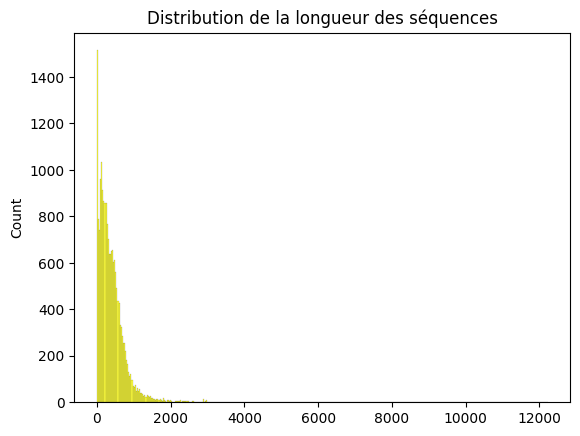

In [41]:
sns.histplot(lengths_of_texts, color='yellow')
plt.title('Distribution de la longueur des séquences')
plt.show()

Nous observons une forte concentration des longueurs entre 1 et 1000 mots. D'où l'importance du padding pour normaliser le nombre d'indices dans chaque séquence.

In [37]:
# sequencing sur les ensembles train et test
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [38]:
# padding

# pour la longueur du padding -> utilisation de la longueur moyenne du corpus entier
avg_length_text = int(np.mean(lengths_of_texts))

X_train_pad = pad_sequences(X_train_seq, maxlen=avg_length_text, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=avg_length_text, padding='post', truncating='post')

In [56]:
# vérifications
print(X_train_pad.shape)
print(X_test_pad.shape)
print('=====================================')
print(X_train_pad[0:5])

(15478, 405)
(3870, 405)
[[5185 1581 3066 ...  218 3851    1]
 [  10   25 1034 ... 1456 5995 2101]
 [ 104 4196  312 ...    0    0    0]
 [6083  671 9099 ...  463 1657  643]
 [  54 2634  243 ...    0    0    0]]


# Réseau de neurones avec une couche embedding

Nous allons dans un premier temps utiliser une architecture simple, fully connected avec une couche d'embedding.

In [39]:
print(X_train_pad.shape, y_train.shape)

(15478, 405) (15478,)


## Implémentation et entraînement

In [16]:
# implémentation du modèle
model = Sequential()

# couche embedding de base
model.add(Embedding(
    input_dim=len(word_index), # dim. de l'input : taille du dictionnaire
    output_dim=16, # dim. dans l'espace vectoriel
    input_length=avg_length_text)) # longueur des séquences prises en compte par le modèle

# flattening pour permettre la full connection au vecteur dense
model.add(Flatten()) # 430 x 32 neurones

# couche dense avec une fonction d'activation 'relu'
model.add(Dense(16, activation='relu'))

# normalisation par lots -> accélère la convergence
model.add(BatchNormalization())

# couche dense avec une fonction d'activation sigmoide pour la prédiction à partir d'une tâche de classification binaire
model.add(Dense(1, activation='sigmoid'))

# compilation : optimisateur Adam (ajuste le taux d'apprentissage aux gradients historiques) et fonction de coût entropie croisée binaire
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# résumé
model.summary()
warnings.filterwarnings("ignore")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 405, 16)           1288704   
                                                                 
 flatten (Flatten)           (None, 6480)              0         
                                                                 
 dense (Dense)               (None, 16)                103696    
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1392481 (5.31 MB)
Trainable params: 1392449 (5.31 MB)
Non-trainable params: 32 (128.00 Byte)
____________

In [27]:
# entraînement
history = model.fit(X_train_pad, y_train, epochs=100,
                    batch_size=200,
                    validation_data=(X_test_pad, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]) # pour réduire l'overfitting
warnings.filterwarnings("ignore")

Epoch 1/100


78/78 [==============================] - 4s 36ms/step - loss: 0.4486 - accuracy: 0.7871 - val_loss: 0.5643 - val_accuracy: 0.8708
Epoch 2/100
78/78 [==============================] - 3s 33ms/step - loss: 0.1252 - accuracy: 0.9566 - val_loss: 0.4372 - val_accuracy: 0.9160
Epoch 3/100
78/78 [==============================] - 2s 31ms/step - loss: 0.0427 - accuracy: 0.9912 - val_loss: 0.3125 - val_accuracy: 0.9243
Epoch 4/100
78/78 [==============================] - 2s 31ms/step - loss: 0.0192 - accuracy: 0.9973 - val_loss: 0.2288 - val_accuracy: 0.9251
Epoch 5/100
78/78 [==============================] - 2s 32ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 0.1893 - val_accuracy: 0.9269
Epoch 6/100
78/78 [==============================] - 3s 32ms/step - loss: 0.0094 - accuracy: 0.9981 - val_loss: 0.1726 - val_accuracy: 0.9274
Epoch 7/100
78/78 [==============================] - 2s 31ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.1804 - val_accuracy: 0.9258
Epoc

## Evaluation

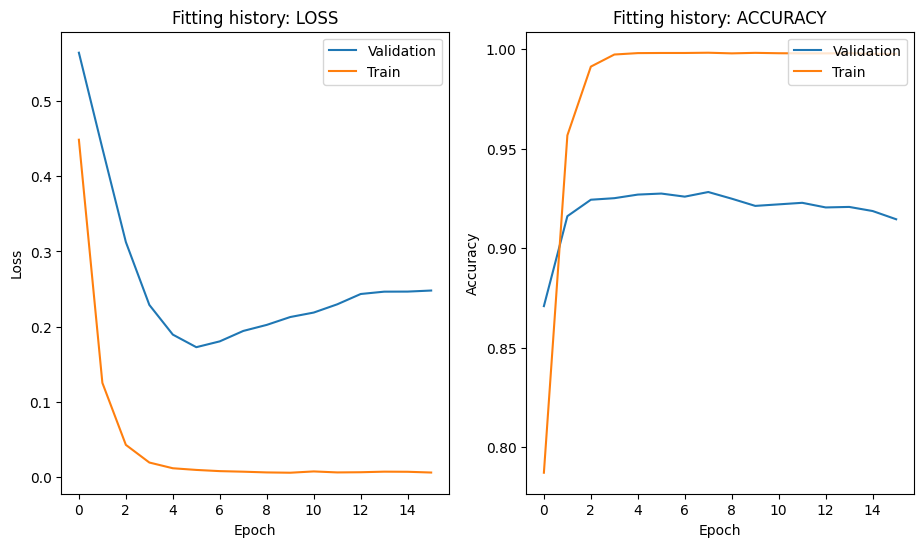

In [28]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss']) ## validation loss
plt.plot(history.history['loss']) ## training loss
plt.title("Fitting history: LOSS")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy']) ## validation loss
plt.plot(history.history['accuracy']) ## training loss
plt.title("Fitting history: ACCURACY")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.show()

L'observation des courbes validation et train suggère un surapprentissage (le modèle performe mieux lors de l'apprentissage mais généralise moins bien sur les données test).

Le modèle souffrant d'overfitting, il nous faut l'optimiser pour diminuer sa complexité. Nous pouvons le faire de deux façons:
- Réduire la dimensionnalité du vecteur d'embedding (16 -> 10)
- Ajouter une couche dropout qui va désactiver aléatoirement et temporairement certains neurones

## Optimisation

In [31]:
# implémentation du modèle avec changements
model_2 = Sequential()
model_2.add(Embedding(input_dim=len(word_index), output_dim=10, input_length=avg_length_text))
model_2.add(Flatten())
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 405, 10)           805440    
                                                                 
 flatten_2 (Flatten)         (None, 4050)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                40510     
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 845961 (3.23 MB)
Trainable params: 845961 (3.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# fit
history_2 = model.fit(X_train_pad, y_train, epochs=50, batch_size=200, validation_data=(X_test_pad, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.2488 - val_accuracy: 0.9186
Epoch 2/50
78/78 [==============================] - 2s 32ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.2482 - val_accuracy: 0.9209
Epoch 3/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.2458 - val_accuracy: 0.9204
Epoch 4/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.2487 - val_accuracy: 0.9204
Epoch 5/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.2613 - val_accuracy: 0.9160
Epoch 6/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.2539 - val_accuracy: 0.9202
Epoch 7/50
78/78 [==============================] - 2s 31ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.2567 - val_accuracy: 0.9181
Epoch 8/50
78

Il existe toujours une grande différence entre les scores de train et de validation, aussi, nous pouvons encore optimiser notre modèle en réduisant encore la dimensionnalité d'entrée et en ajoutant une régularisation L2.

In [66]:
# changements
model_3 = Sequential()
model_3.add(Embedding(input_dim=len(word_index), output_dim=8, input_length=avg_length_text))
model_3.add(Flatten())
model_3.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 405, 8)            644352    
                                                                 
 flatten (Flatten)           (None, 3240)              0         
                                                                 
 dense (Dense)               (None, 8)                 25928     
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 670289 (2.56 MB)
Trainable params: 670289 (2.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# réduction de la patience -> restauration des poids optimaux
history_3 = model_3.fit(X_train_pad, y_train, epochs=50, batch_size=200, validation_data=(X_test_pad, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/50


78/78 [==============================] - 3s 20ms/step - loss: 0.6731 - accuracy: 0.7057 - val_loss: 0.5505 - val_accuracy: 0.8124
Epoch 2/50
78/78 [==============================] - 1s 17ms/step - loss: 0.5086 - accuracy: 0.8370 - val_loss: 0.4011 - val_accuracy: 0.8987
Epoch 3/50
78/78 [==============================] - 1s 18ms/step - loss: 0.4169 - accuracy: 0.8800 - val_loss: 0.3343 - val_accuracy: 0.9121
Epoch 4/50
78/78 [==============================] - 1s 17ms/step - loss: 0.3628 - accuracy: 0.9083 - val_loss: 0.2920 - val_accuracy: 0.9253
Epoch 5/50
78/78 [==============================] - 1s 16ms/step - loss: 0.3232 - accuracy: 0.9253 - val_loss: 0.2724 - val_accuracy: 0.9297
Epoch 6/50
78/78 [==============================] - 2s 20ms/step - loss: 0.2973 - accuracy: 0.9375 - val_loss: 0.2541 - val_accuracy: 0.9357
Epoch 7/50
78/78 [==============================] - 1s 16ms/step - loss: 0.2705 - accuracy: 0.9457 - val_loss: 0.2365 - val_accuracy: 0.9393
Epoch 8/50


Nous constatons que le score d'entraînement a diminué tandis que celui de validation a augmenté, ainsi l'écart entre les 2 courbes se réduit.

## Comparaison des performances pour les 3 modèles

In [15]:
models_comparison = pd.DataFrame({'Model': ['NN1', 'NN2', 'NN3'],
                                  'Train_loss' : [0.0059, 0.0051, 0.1206],
                                  'Train_acc'  : [0.9976, 0.9982, 0.9826],
                                  'Val_loss'   : [0.2480, 0.2517, 0.1828],
                                  'Val_acc'    : [0.9145, 0.9217, 0.9442]
                                 })

In [19]:
pio.templates.default = 'plotly_white'
df_melted = models_comparison.melt(id_vars='Model', var_name='Metric', value_name='Value')

# séparation des données
df_loss = df_melted[df_melted['Metric'].isin(['Train_loss', 'Val_loss'])]
df_acc = df_melted[df_melted['Metric'].isin(['Train_acc', 'Val_acc'])]

# graphique losses
fig_loss = px.bar(df_loss, x='Model', y='Value', color='Metric', barmode='group', text='Value',
                  title='Comparaison des pertes d\'entraînement et de validation', 
                  labels={'Model': 'Modèle', 'Value': 'Valeur', 'Metric': 'Métrique'},
                  color_discrete_map={'Train_loss': 'lightyellow', 'Val_loss': 'yellow'})
fig_loss.update_layout(yaxis_showgrid=False)

# graphique accuracies
fig_acc = px.bar(df_acc, x='Model', y='Value', color='Metric', barmode='group', text='Value',
                 title='Comparaison des précisions d\'entraînement et de validation', 
                 labels={'Model': 'Modèle', 'Value': 'Valeur', 'Metric': 'Métrique'},
                 color_discrete_map={'Train_acc': 'lightgrey', 'Val_acc': 'grey'})
fig_acc.update_layout(yaxis_showgrid=False)
fig_acc.update_yaxes(range=[0.9, 1])

fig_loss.show()
fig_acc.show()

## Sauvegarde du meilleur modèle

In [22]:
# exportation du modèle
dump(model_3, 'model_simple_embed.joblib')

['model_simple_embed.joblib']

In [ ]:
# importation du modèle
model_simple_embed = load('model_simple_embed.joblib')
warnings.filterwarnings("ignore")

# RNN simple

Jusqu'à présent, les modèles passés en revue ont pris en considération des caractéristiques d'importance des mots dans un corpus. TF-IDF a permis de caractériser des fréquences relatives, et le word embedding a élaboré un dictionnaire de mots fréquents, tout en conservant leur agencement dans une séquence. Le premier modèle a pu tenir compte de  séquences fixes, mais sans que le modèle ne prenne en charge de manière ciblée cette séquentialité. Nous allons à présent introduire une dimension de séquentialité dans le traitement du texte, à partir des réseaux de neurones récurrents ou RNN. Dans la plupart des langages, l'ordre des mots est la caractéristique la plus discriminante pour la compréhension humaine. Il est à noter que c'est principalement le cas pour l'Anglais, langue que nous traitons ici. Or, certaines langues dites casuelles, sont centrées davantage sur les liaisons grammaticales (e.g. les cas en Allemand). Dans la langue qui nous occupe, l'utilisation d'une architecture séquentielle nous semble très pertinente pour augmenter les performances d'un modèle à une tâche classification de textes. Ainsi, les modèles se baseront sur une probabilité de voir un mot apparaître, en fonction du/des mot(s) précédent(s). Al-Tai et al. (2023) comparent cette fonctionnalité à une forme de mémoire.

Ici nous allons considérer un modèle de type 'many-to-one' (séquence à vecteur) dans le sens où à partir d'une séquence de mots est générée une seule prédiction finale.

In [40]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = len(word_index), output_dim = 8, input_length=avg_length_text))
model_rnn.add(SimpleRNN(16)) # couche récurrente
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(8, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation= 'sigmoid'))
model_rnn.compile(optimizer = 'adam', loss = ['binary_crossentropy'], metrics = ['accuracy'])
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 405, 8)            644352    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 644897 (2.46 MB)
Trainable params: 64489

In [41]:
# fit
history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=40, batch_size=200, validation_data=(X_test_pad, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/40
78/78 [==============================] - 7s 77ms/step - loss: 0.6863 - accuracy: 0.5763 - val_loss: 0.6705 - val_accuracy: 0.5860
Epoch 2/40
78/78 [==============================] - 5s 68ms/step - loss: 0.6690 - accuracy: 0.5959 - val_loss: 0.6613 - val_accuracy: 0.5850
Epoch 3/40
78/78 [==============================] - 5s 67ms/step - loss: 0.6629 - accuracy: 0.6031 - val_loss: 0.6586 - val_accuracy: 0.5897
Epoch 4/40
78/78 [==============================] - 5s 68ms/step - loss: 0.6497 - accuracy: 0.6190 - val_loss: 0.6565 - val_accuracy: 0.6041
Epoch 5/40
78/78 [==============================] - 5s 67ms/step - loss: 0.6341 - accuracy: 0.6385 - val_loss: 0.6551 - val_accuracy: 0.6230
Epoch 6/40
78/78 [==============================] - 6s 75ms/step - loss: 0.6078 - accuracy: 0.6710 - val_loss: 0.6592 - val_accuracy: 0.6214
Epoch 7/40
78/78 [==============================] - 8s 107ms/step - loss: 0.5770 - accuracy: 0.7223 - val_loss: 0.6672 - val_accuracy: 0.6295
Epoch 8/40
7

## Evaluation

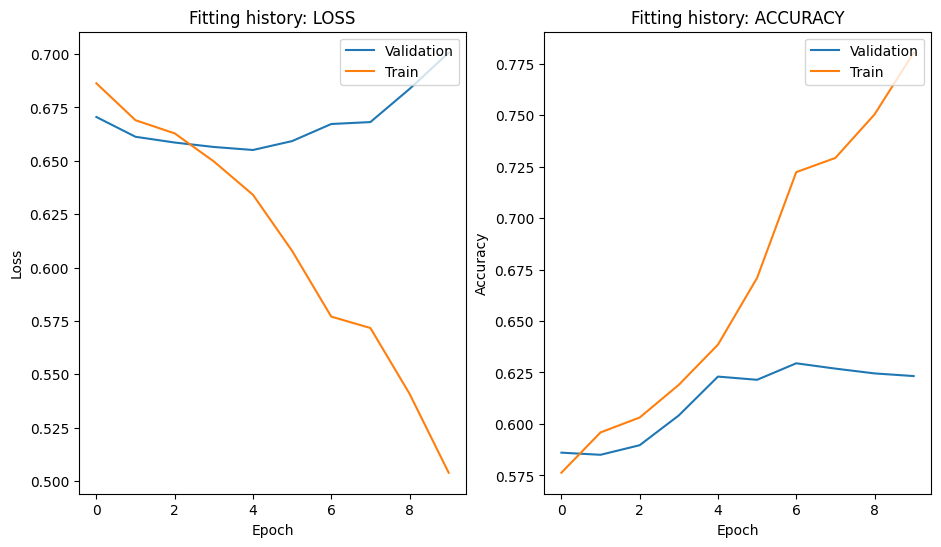

In [42]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(history_rnn.history['val_loss'])
plt.plot(history_rnn.history['loss'])
plt.title("Fitting history: LOSS")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history_rnn.history['val_accuracy'])
plt.plot(history_rnn.history['accuracy'])
plt.title("Fitting history: ACCURACY")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.show()

On constate une moindre stabilité dans le score et la perte, par rapport à nos modèles précédents, ainsi qu'une moindre performance, même si une capacité d'apprentissage existe, avec toutefois un écart entre les données d'entraînement et de validation suggérant un overfitting.

# LSTM

L'instabilité observée dans le RNN simple peut être attribuée à un problème d'exploding gradient, phénomène courant dans ce type d'architecture, lorsqu'un traitement séquentiel est réalisé sur des séquences très longues. Mathématiquement, lors de l'entraînement et plus précisément de la rétropropagation, les gradients des poids sont calculés par rapport à une fonction de perte à l'aide de la règle des chaînes. Si les poids sont grands, le gradient peut exploser à mesure du processus et empêcher la convergence de la fonction vers un minimum. Selon Al-Tai et al. (2023), l'utilisation d'une extension LSTM dans un RNN présente l'avantage de contourner le biais des vanishing/exploding gradients, tout en autorisant l'apprentissage sur de longues séquences. Cela s'explique par l'existence d'une 'mémoire à long terme' et d'une 'mémoire à court terme' inhérentes à la couche LSTM qui permettent au modèle de n'être pas autant affecté par la rétropropagation que les RNN simples. Des mécanismes de contrôle optimisent par l'intermédiaire de 'gate' les quantités d'informations à traiter à court ou à long terme, et celles à oublier, un peu à la manière dont travaille la mémoire humaine.

In [98]:
# LSTM simple
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=len(word_index), output_dim=16, input_length=avg_length_text))
model_LSTM.add(LSTM(64, activation='tanh', return_sequences=True))
model_LSTM.add(LSTM(32, activation='tanh', return_sequences=False))
model_LSTM.add(Dense(16, activation='relu'))
model_LSTM.add(BatchNormalization())
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 405, 16)           1288704   
                                                                 
 lstm_8 (LSTM)               (None, 405, 64)           20736     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_3 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

In [44]:
history_LSTM = model_LSTM.fit(
                              X_train_pad, y_train, 
                              epochs=10,
                              batch_size=96,
                              validation_data=(X_test_pad, y_test),
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                              )

Epoch 1/10
162/162 [==============================] - 72s 418ms/step - loss: 0.5250 - accuracy: 0.7432 - val_loss: 1.1062 - val_accuracy: 0.5889
Epoch 2/10
162/162 [==============================] - 67s 412ms/step - loss: 0.4051 - accuracy: 0.8181 - val_loss: 0.4419 - val_accuracy: 0.7863
Epoch 3/10
162/162 [==============================] - 65s 401ms/step - loss: 0.2534 - accuracy: 0.9008 - val_loss: 0.3400 - val_accuracy: 0.8819
Epoch 4/10
162/162 [==============================] - 65s 404ms/step - loss: 0.1751 - accuracy: 0.9424 - val_loss: 0.3066 - val_accuracy: 0.9005
Epoch 5/10
162/162 [==============================] - 66s 407ms/step - loss: 0.1725 - accuracy: 0.9447 - val_loss: 0.2529 - val_accuracy: 0.9176
Epoch 6/10
162/162 [==============================] - 67s 414ms/step - loss: 0.1518 - accuracy: 0.9554 - val_loss: 0.5991 - val_accuracy: 0.8525
Epoch 7/10
162/162 [==============================] - 65s 401ms/step - loss: 0.1563 - accuracy: 0.9557 - val_loss: 0.2863 - val_ac

L'originalité du LSTM réside également dans sa capacité à traiter l'information de manière bidirectionnelle, c'est-à-dire à la fois dans le sens de la phrase, mais également en sens inverse, capturant ainsi mieux les dépendances contextuelles. Cela rendrait plus efficace la prise en compte de la sémantique globale d'un texte.

In [91]:
# LSTM bidirectionnel
model_bidirLSTM = Sequential()
model_bidirLSTM.add(Embedding(input_dim=len(word_index), output_dim=4, input_shape=(X_train_pad.shape[1:])))
model_bidirLSTM.add(Dropout(0.4))
model_bidirLSTM.add(Bidirectional(LSTM(units=16, activation='tanh', return_sequences=True, recurrent_dropout=0.4, dropout=0.4)))
model_bidirLSTM.add(Bidirectional(LSTM(units=8, activation='tanh', return_sequences=False, recurrent_dropout=0.3, dropout=0.3)))
model_bidirLSTM.add(BatchNormalization())
model_bidirLSTM.add(Dense(units=1, activation="sigmoid"))
model_bidirLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bidirLSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 405, 4)            322176    
                                                                 
 dropout_3 (Dropout)         (None, 405, 4)            0         
                                                                 
 bidirectional_lstm_1 (Bidi  (None, 405, 32)           2688      
 rectional)                                                      
                                                                 
 bidirectional_lstm_2 (Bidi  (None, 16)                2624      
 rectional)                                                      
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                      

In [48]:
history_bidirLSTM = model_bidirLSTM.fit(
                                        x = X_train_pad,
                                        y = y_train,
                                        validation_data = (X_test_pad, y_test),
                                        epochs = 15,
                                        batch_size = 200,
                                        shuffle = True,
                                        callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                                        )

Epoch 1/15
78/78 [==============================] - 121s 1s/step - loss: 0.5322 - accuracy: 0.7148 - val_loss: 0.5497 - val_accuracy: 0.8630
Epoch 2/15
78/78 [==============================] - 114s 1s/step - loss: 0.2764 - accuracy: 0.8877 - val_loss: 0.4232 - val_accuracy: 0.8406
Epoch 3/15
78/78 [==============================] - 114s 1s/step - loss: 0.2039 - accuracy: 0.9217 - val_loss: 0.2700 - val_accuracy: 0.8974
Epoch 4/15
78/78 [==============================] - 120s 2s/step - loss: 0.1671 - accuracy: 0.9373 - val_loss: 0.1859 - val_accuracy: 0.9341
Epoch 5/15
78/78 [==============================] - 125s 2s/step - loss: 0.1463 - accuracy: 0.9468 - val_loss: 0.1830 - val_accuracy: 0.9351
Epoch 6/15
78/78 [==============================] - 136s 2s/step - loss: 0.1379 - accuracy: 0.9490 - val_loss: 0.2044 - val_accuracy: 0.9176
Epoch 7/15
78/78 [==============================] - 172s 2s/step - loss: 0.1241 - accuracy: 0.9532 - val_loss: 0.1797 - val_accuracy: 0.9364
Epoch 8/15
78

## Evaluation

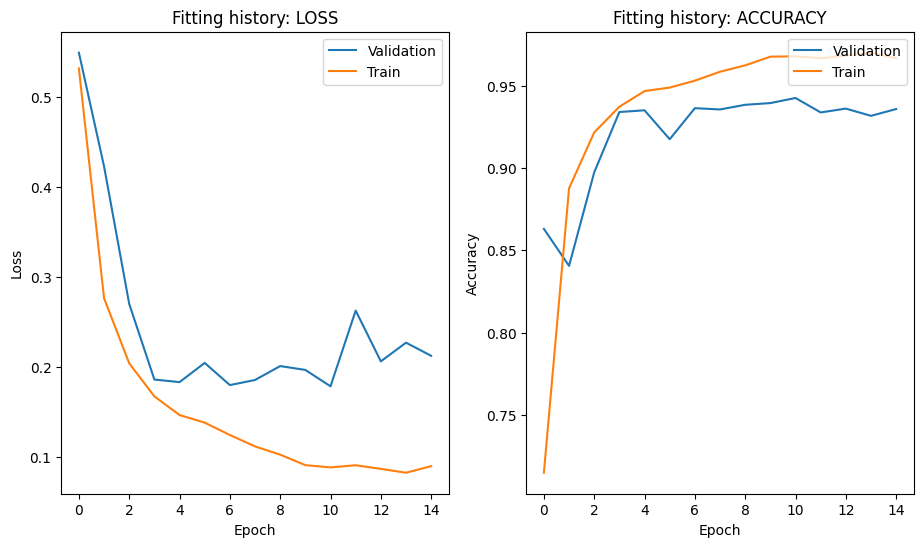

In [49]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(history_bidirLSTM.history['val_loss'])
plt.plot(history_bidirLSTM.history['loss'])
plt.title("Fitting history: LOSS")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history_bidirLSTM.history['val_accuracy'])
plt.plot(history_bidirLSTM.history['accuracy'])
plt.title("Fitting history: ACCURACY")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.show()

## Sauvegarde

In [71]:
# exportation
dump(model_bidirLSTM, 'model_bidir_lstm.joblib')

['model_bidir_lstm.joblib']

In [ ]:
# importation
model_bidir_lstm = load('model_bidir_lstm.joblib')

# LSTM + CNN

Testons à présent l’approche combinant un réseau avec couches LSTM bidirectionnelles (les plus efficaces) et des couches de convolution propres au CNN, afin d’allier deux perspectives complémentaires dans l’extraction de caractéristiques propres aux documents, d’une part la capture de la séquentialité des mots avec LSTM (dans une perspective globale), associée à une extraction de caractéristiques locales par l’intermédiaire du CNN. 

In [96]:
# LSTM + CNN (Conv1D)
model_lstm_cnn = Sequential()
model_lstm_cnn.add(Embedding(input_dim=len(word_index), output_dim=4, input_shape=(X_train_pad.shape[1:])))
model_lstm_cnn.add(Conv1D(128, 1, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(2, padding="same"))
model_lstm_cnn.add(Bidirectional(LSTM(32)))
model_lstm_cnn.add(Dense(100, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Dense(1, kernel_regularizer=regularizers.l1(0.005), activation='sigmoid'))
model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 405, 4)            322176    
                                                                 
 conv1d_1 (Conv1D)           (None, 405, 128)          640       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 203, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [97]:
history_lstm_cnn = model_lstm_cnn.fit(
                                        x = X_train_pad,
                                        y = y_train,
                                        validation_data = (X_test_pad, y_test),
                                        epochs = 15,
                                        batch_size = 200,
                                        shuffle = True,
                                        callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
                                        )

Epoch 1/15
78/78 [==============================] - 98s 1s/step - loss: 2.4907 - accuracy: 0.7991 - val_loss: 1.7743 - val_accuracy: 0.6630
Epoch 2/15
78/78 [==============================] - 92s 1s/step - loss: 0.8069 - accuracy: 0.9360 - val_loss: 0.7833 - val_accuracy: 0.6628
Epoch 3/15
78/78 [==============================] - 93s 1s/step - loss: 0.2254 - accuracy: 0.9620 - val_loss: 0.5945 - val_accuracy: 0.6832
Epoch 4/15
78/78 [==============================] - 89s 1s/step - loss: 0.1457 - accuracy: 0.9760 - val_loss: 0.4150 - val_accuracy: 0.9227
Epoch 5/15
78/78 [==============================] - 86s 1s/step - loss: 0.1070 - accuracy: 0.9848 - val_loss: 0.3156 - val_accuracy: 0.9279
Epoch 6/15
78/78 [==============================] - 84s 1s/step - loss: 0.1003 - accuracy: 0.9857 - val_loss: 0.2678 - val_accuracy: 0.9191
Epoch 7/15
78/78 [==============================] - 85s 1s/step - loss: 0.0760 - accuracy: 0.9935 - val_loss: 0.2678 - val_accuracy: 0.9207
Epoch 8/15
78/78 [==

## Evaluation

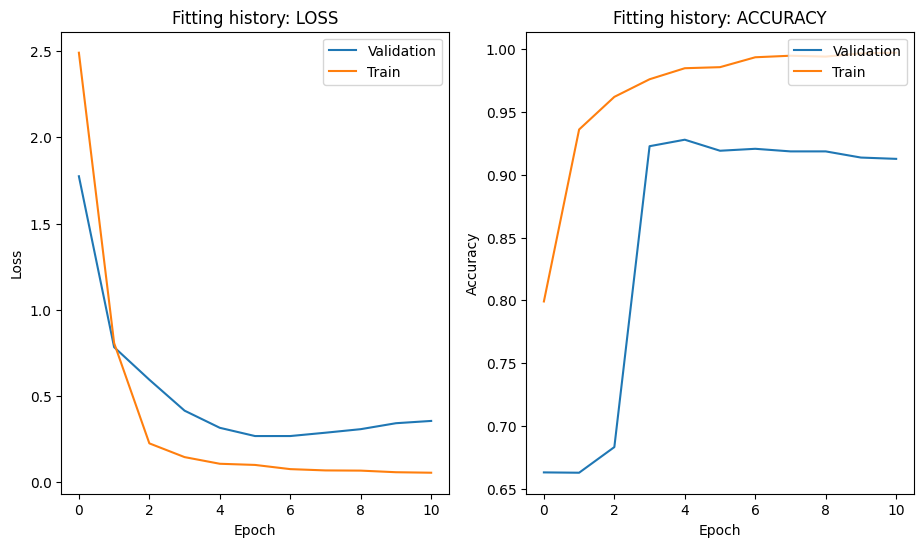

In [99]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(history_lstm_cnn.history['val_loss'])
plt.plot(history_lstm_cnn.history['loss'])
plt.title("Fitting history: LOSS")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history_lstm_cnn.history['val_accuracy'])
plt.plot(history_lstm_cnn.history['accuracy'])
plt.title("Fitting history: ACCURACY")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.show()

## Sauvegarde

In [101]:
# exportation
dump(model_lstm_cnn, 'model_lstm_cnn.joblib')

In [ ]:
# importation
model_lstm_cnn = load('model_lstm_cnn.joblib')

# Utilisation de Word2Vec

Word2Vec est une méthode de représentation de mots à l'aide de vecteurs de réels denses. Des mots proches en termes de sens auront une représentation vectorielle proche. Le modèle a été développé par Google et se base sur un réseau de neurones peu profond : une couche intermédiaire (souvent 300 neurones), dont les poids forment la représentation vectorielle du mot. Le réseau sera pré-entraîné selon une méthode non supervisée, à partir de notre corpus de données.

In [57]:
# conversion des phrases en listes de mots (reprise de la matrice X)
X_tokenized = [sentence.split() for sentence in X]

In [58]:
# entraînement du modèle Word2Vec avec les phrases tokenizées
embedding_dim = 100
w2v_model = Word2Vec(sentences=X_tokenized, vector_size=embedding_dim, window=5, min_count=1)

Nous avons choisi un espace vectoriel de taille conséquente ainsi qu'un min_count de 1 (nombre minimal d'occurrences d'un mot pour que celui-ci soit pris en compte) de 1, afin d'obtenir un grand lexique de mots.

In [20]:
w2v_model.wv.most_similar("terror")

[('terrorist', 0.8045339584350586),
 ('jihadist', 0.6601217985153198),
 ('extremist', 0.63368821144104),
 ('islam', 0.5868473052978516),
 ('islamist', 0.5812920928001404),
 ('isi', 0.5807709693908691),
 ('isil', 0.5731128454208374),
 ('pakistan', 0.5714085102081299),
 ('enemi', 0.5690454244613647),
 ('homegrown', 0.5569483637809753)]

In [21]:
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])

[('bush', 0.5301826000213623),
 ('sander', 0.5144396424293518),
 ('oppon', 0.5076156258583069),
 ('repeat', 0.5024576187133789),
 ('rubio', 0.5013020634651184),
 ('candid', 0.4967515766620636),
 ('trail', 0.4875049591064453),
 ('hillari', 0.4644887447357178),
 ('romney', 0.46314746141433716),
 ('hesit', 0.4612003266811371)]

La similarité semble être fonctionnelle, le modèle parvient à capturer la sémantique des textes.

## Vectorisation pour le réseau de neurones

In [59]:
# tokenising (mapping des mots par des indices)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_tokenized)
X = tokenizer.texts_to_sequences(X_tokenized)

In [60]:
# affichage des 10 premiers mots du premier texte
X[0][:10]

[1830, 277, 1, 1755, 1085, 616, 439, 262, 1200, 28385]

In [61]:
# affichage des 10 premiers mappings
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} : {num}")
    if num == 10:
        break

trump : 1
said : 2
clinton : 3
state : 4
would : 5
one : 6
peopl : 7
elect : 8
presid : 9
year : 10


In [62]:
avg_length_text = 430 # longueur moyenne des séquences obtenue dans le vectorizing précédent

In [63]:
len(word_index)

90952

In [64]:
vocab_size = len(tokenizer.word_index) + 1

In [65]:
# fonction qui créé d'une matrice de poids à partir du modèle w2v
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1 # taille du vocabulaire (nombre de mots uniques): il faut ajouter 1 pour prendre en compte l'indice 0 (mots inconnus)
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [66]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [67]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15478 3870 15478 3870


In [68]:
# sequencing
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [70]:
max_sequence_length = 430

# padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [76]:
# vérifications
print(X_train_pad.shape)
print(X_test_pad.shape)
print('=====================================')
print(X_train_pad[0:5])

(15478, 430)
(3870, 430)
[[3962    2   16 ...   13 2693 1095]
 [ 474  446  449 ...   30  163  732]
 [   0    0    0 ...  184 1154  245]
 [ 616   79 2248 ... 1456   12 3006]
 [   0    0    0 ...  104  206   14]]


In [71]:
X_train = np.expand_dims(X_train_pad, axis=-1)
X_test = np.expand_dims(X_test_pad, axis=-1)

## Création du modèle prenant Word2Vec

In [74]:
model_w2v_bidirlstm_cnn = Sequential()
model_w2v_bidirlstm_cnn.add(Embedding(vocab_size, output_dim=embedding_dim, weights=[embedding_vectors], input_length=avg_length_text, trainable=False))
model_w2v_bidirlstm_cnn.add(Conv1D(128, 1, activation='relu'))
model_w2v_bidirlstm_cnn.add(MaxPooling1D(2, padding="same"))
model_w2v_bidirlstm_cnn.add(Bidirectional(LSTM(32)))
model_w2v_bidirlstm_cnn.add(Dense(100, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model_w2v_bidirlstm_cnn.add(BatchNormalization())
model_w2v_bidirlstm_cnn.add(Dropout(0.5))
model_w2v_bidirlstm_cnn.add(Dense(1, kernel_regularizer=regularizers.l1(0.005), activation='sigmoid'))
model_w2v_bidirlstm_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_w2v_bidirlstm_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 430, 100)          9095300   
                                                                 
 conv1d_1 (Conv1D)           (None, 430, 128)          12928     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 215, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_1 (Bat  (None, 100)              

In [75]:
history_w2v_bidirlstm_cnn = model_w2v_bidirlstm_cnn.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6


339/339 [==============================] - 46s 112ms/step - loss: 1.9664 - accuracy: 0.8030 - val_loss: 0.9713 - val_accuracy: 0.8379
Epoch 2/6
339/339 [==============================] - 39s 114ms/step - loss: 0.5835 - accuracy: 0.8938 - val_loss: 0.4557 - val_accuracy: 0.8721
Epoch 3/6
339/339 [==============================] - 35s 104ms/step - loss: 0.3286 - accuracy: 0.9166 - val_loss: 0.3428 - val_accuracy: 0.8915
Epoch 4/6
339/339 [==============================] - 35s 104ms/step - loss: 0.2617 - accuracy: 0.9294 - val_loss: 0.2784 - val_accuracy: 0.9169
Epoch 5/6
339/339 [==============================] - 35s 105ms/step - loss: 0.2355 - accuracy: 0.9409 - val_loss: 0.2603 - val_accuracy: 0.9274
Epoch 6/6
339/339 [==============================] - 35s 104ms/step - loss: 0.2139 - accuracy: 0.9460 - val_loss: 0.2650 - val_accuracy: 0.9270


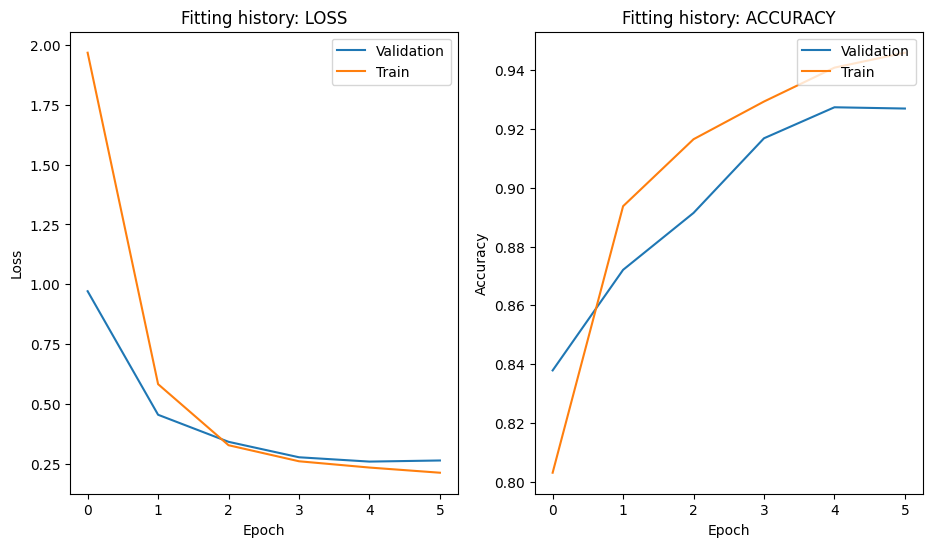

In [77]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(history_w2v_bidirlstm_cnn.history['val_loss'])
plt.plot(history_w2v_bidirlstm_cnn.history['loss'])
plt.title("Fitting history: LOSS")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.subplot(1,2,2)
plt.plot(history_w2v_bidirlstm_cnn.history['val_accuracy'])
plt.plot(history_w2v_bidirlstm_cnn.history['accuracy'])
plt.title("Fitting history: ACCURACY")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Train'], loc = 'upper right')

plt.show()

In [78]:
# exportation
dump(model_w2v_bidirlstm_cnn, 'model_w2v_bidirlstm_cnn.joblib')

In [ ]:
# importation
model_w2v_bidirlstm_cnn = load('model_w2v_bidirlstm_cnn.joblib')

# Tests sur de nouvelles données

In [16]:
# récupération des df scrapés
df_new_fake = pd.read_csv('data_new_fake_theonion.csv', usecols=['articles'])
df_new_real = pd.read_csv('data_new_real_time.csv', usecols=['articles'])

In [17]:
# ajout d'une colonne de labels
df_new_fake['label'] = 0
df_new_real['label'] = 1

In [18]:
# concaténation
df_new = pd.concat([df_new_fake, df_new_real], ignore_index=True)

In [19]:
# rappel de la fonction pré-traitement linguistique
common_abbreviations = ["mr", "mrs", "ms", "dr", "etc"]

def preprocess_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
    tokens = [word for word in tokens if not word.isdigit()]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [token for token in tokens if token.lower() not in common_abbreviations]
    tokens = [re.sub(r'\b[A-Za-z]\.', '', token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [20]:
# pré-processing NLP avec la fonction préalablement implémentée
df_new['preprocessed_text'] = df_new['articles'].apply(preprocess_text)

In [21]:
# préparation
X_new = df_new['preprocessed_text']
X_new 

0       dayton oh greet crowd campaign ralli thursday ...
1       presidenti candid donald trump recent remark l...
2       rnc go pay probabl work worth shot week lara b...
3       vandalia oh draw critic mani call dehuman hurt...
4       washington mind spin pour sheaf paper vice pre...
                              ...                        
3686    florida legisl propos ban abort state allow la...
3687    presid joe biden stood front icon green marbl ...
3688    articl part dc brief time polit newslett sign ...
3689    presid joe biden remark unit nation general as...
3690    texa controversi six week abort banha effect d...
Name: preprocessed_text, Length: 3691, dtype: object

In [22]:
y_new = df_new['label']
y_new

0       0
1       0
2       0
3       0
4       0
       ..
3686    1
3687    1
3688    1
3689    1
3690    1
Name: label, Length: 3691, dtype: int64

In [40]:
# utilisation de l'objet tokenizer (instancié plus haut) pour obtenir des séquences d'index sur tout le corpus (matrice X)
X_seq = tokenizer.texts_to_sequences(X_new)

In [41]:
# vérifications
print(type(X_seq))
print(X_seq[0])
print(X_seq[1])

<class 'list'>
[1, 1787, 3385, 854, 15, 445, 475, 97, 10, 43, 2, 381, 3177, 28, 7352, 90, 230, 1165, 63, 1, 284, 814, 124, 216, 64, 59, 34, 1915, 1349, 3122, 3576, 1, 4791, 9959, 263, 296, 4922, 1, 2662, 9068, 5778, 1, 1, 3820, 1276, 29, 23, 7369, 284, 1, 7352, 3134, 29, 47, 213, 4139, 41, 1366, 6176, 56, 232, 230, 759, 2, 5483, 1311, 2992, 6, 240, 7352, 3748, 246, 445, 3763, 1695, 1607]
[64, 59, 43, 2, 120, 821, 507, 9, 9338, 37, 1, 179, 1499, 288, 1099, 5792, 1564, 5263, 5263, 5263, 2389, 1416, 6627, 5536, 431, 31, 6857, 269, 354, 41, 3, 1, 79, 284, 1, 193, 79, 60, 2951, 2, 99, 609, 711, 560, 480, 7, 2, 891, 717, 612, 1131, 346, 1852, 4096, 6225, 1143, 40, 233, 1645, 2238, 835, 828, 9338, 17, 2, 1527, 320, 2941, 8398, 445, 1609, 576, 2951, 35, 8790, 748, 9338, 141, 901, 2221, 2070, 2, 581, 823, 116, 1861, 1167, 2486, 1065, 595, 630, 688, 489, 990, 197, 283, 2, 3, 283, 85, 300, 2, 642, 138, 9, 278, 22, 294, 687, 4646, 1, 9711, 453, 998, 127, 9711, 83, 79, 12, 7, 2405, 272, 787, 1313, 

In [42]:
# padding
X_pad = pad_sequences(X_seq, maxlen=avg_length_text, padding='post', truncating='post')

In [89]:
# vérifications
print(X_pad.shape)
print('=====================================')
print(X_pad[0:5])

(3691, 430)
[[10354  1778  3334 ...     0     0     0]
 [   63    58    44 ...     0     0     0]
 [ 2076    23   305 ...     0     0     0]
 [39177  1778  1409 ...     0     0     0]
 [  125   476  2794 ...     0     0     0]]


In [ ]:
# prédictions modèle embedding simple
pred_simple_embed = model_simple_embed.predict(X_pad)

In [86]:
len(pred_simple_embed)

3691

In [87]:
# évaluation
threshold = 0.5  # seuil de probabilité

# classes prédites en fonction du seuil de probabilité
pred_classes = (pred_simple_embed > threshold).astype(int)
print(classification_report(y_new, pred_classes, digits=5))

              precision    recall  f1-score   support

           0    0.76603   0.37719   0.50549      1710
           1    0.62618   0.90056   0.73872      1981

    accuracy                        0.65809      3691
   macro avg    0.69611   0.63887   0.62210      3691
weighted avg    0.69097   0.65809   0.63066      3691



In [50]:
# prédictions LSTM bidirectionnel
pred_bidir_lstm = model_bidirLSTM.predict(X_pad)

# évaluation
threshold = 0.5  # seuil de probabilité
pred_classes = (pred_bidir_lstm > threshold).astype(int)
print(classification_report(y_new, pred_classes, digits=5))

116/116 [==============================] - 132s 1s/step
              precision    recall  f1-score   support

           0    0.81781   0.47251   0.59896      1710
           1    0.66630   0.90914   0.76900      1981

    accuracy                        0.70685      3691
   macro avg    0.74206   0.69083   0.68398      3691
weighted avg    0.73649   0.70685   0.69022      3691



In [46]:
# prédictions BidirLSTM + CNN
pred_lstm_cnn = model_lstm_cnn.predict(X_pad)

# évaluation
threshold = 0.5  # seuil de probabilité
pred_classes = (pred_lstm_cnn > threshold).astype(int)
print(classification_report(y_new, pred_classes, digits=5))

116/116 [==============================] - 3s 24ms/step
              precision    recall  f1-score   support

           0    0.84695   0.57602   0.68569      1710
           1    0.71321   0.91015   0.79973      1981

    accuracy                        0.75535      3691
   macro avg    0.78008   0.74308   0.74271      3691
weighted avg    0.77517   0.75535   0.74690      3691



In [90]:
# prédictions w2v / BidirLSTM + CNN
pred_w2v_bidirlstm_cnn = model_w2v_bidirlstm_cnn.predict(X_pad)

# évaluation
threshold = 0.5  # seuil de probabilité
pred_classes = (pred_w2v_bidirlstm_cnn > threshold).astype(int)
print(classification_report(y_new, pred_classes, digits=5))

116/116 [==============================] - 4s 26ms/step
              precision    recall  f1-score   support

           0    0.77514   0.99181   0.87019      1710
           1    0.99069   0.75164   0.85476      1981

    accuracy                        0.86291      3691
   macro avg    0.88291   0.87173   0.86248      3691
weighted avg    0.89082   0.86291   0.86191      3691



# Benchmark et discussion

Cf. notebook #3